In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [3]:
train_path='New-Masks-Dataset/Train'
valid_path='New-Masks-Dataset/Validation'
test_path='New-Masks-Dataset/Test'

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Mask', 'Non Mask'], batch_size=10)
validation_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224),classes=['Mask', 'Non Mask'], batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10,classes=['Mask', 'Non Mask'], shuffle=False)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n==600
assert test_batches.n==100
assert train_batches.num_classes==test_batches.num_classes==2

In [6]:
imgs, labels=next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

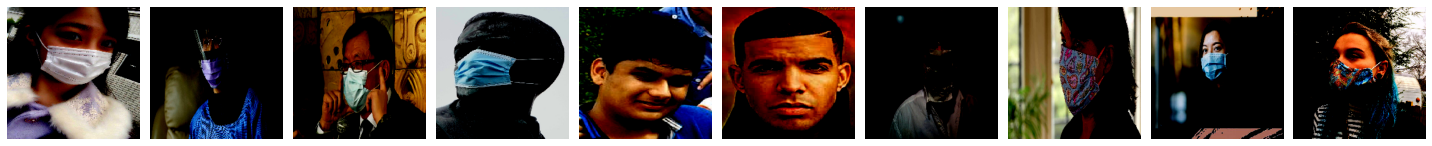

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
x=mobile.layers[-6].output

In [11]:
output=Dense(units=2,activation='softmax')(x)

In [12]:
mobile_new=Model(inputs=mobile.input, outputs=output)

In [13]:
for layer in mobile_new.layers[:-23]:
    layer.trainable=False

In [14]:
mobile_new.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [15]:
mobile_new.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=mobile_new.fit(x=train_batches, validation_data=validation_batches,
               steps_per_epoch=len(train_batches),validation_steps=len(validation_batches),
              epochs=10,
              verbose=2)

Train for 60 steps, validate for 31 steps
Epoch 1/10
60/60 - 51s - loss: 0.2893 - accuracy: 0.9417 - val_loss: 2.1884 - val_accuracy: 0.7320
Epoch 2/10
60/60 - 54s - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.1047 - val_accuracy: 0.9837
Epoch 3/10
60/60 - 55s - loss: 0.0072 - accuracy: 0.9967 - val_loss: 0.6201 - val_accuracy: 0.9281
Epoch 4/10
60/60 - 56s - loss: 5.1103e-04 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9706
Epoch 5/10
60/60 - 57s - loss: 1.0836e-04 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9837
Epoch 6/10
60/60 - 56s - loss: 7.7046e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9902
Epoch 7/10
60/60 - 57s - loss: 6.1716e-05 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 0.9902
Epoch 8/10
60/60 - 55s - loss: 5.0962e-05 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9902
Epoch 9/10
60/60 - 57s - loss: 4.3456e-05 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9869
Epoch 10/10
60/60 - 58s - loss: 3.7800e-05 

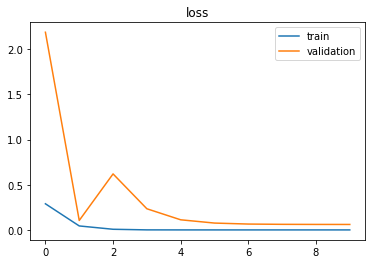

In [17]:
plt.subplot()
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

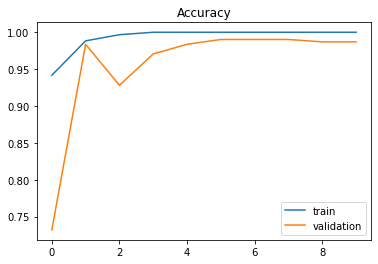

In [18]:
plt.subplot()
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()

In [19]:
mobile_new.get_weights()

[array([[[[ 8.87084053e-14,  3.11129272e-01,  1.19772255e-02,
            1.65614850e-13,  1.67507152e-14,  2.31184348e-01,
           -2.32737631e-01, -2.96911478e-01, -4.32953903e-15,
            8.21083635e-02,  3.79058927e-01,  9.35078702e-14,
            1.45881534e-01,  1.58076912e-01, -1.66753982e-03,
            4.56319394e-05, -5.14434686e-13, -1.85627863e-01,
            4.04302508e-01, -2.56781399e-01,  1.27436947e-13,
            8.86099631e-15, -6.08684048e-02,  2.80227751e-01,
            1.13050954e-03,  2.00989982e-03,  3.01095426e-01,
           -1.71066225e-01, -5.65458477e-01,  2.62688458e-01,
           -4.01542217e-01, -2.50179484e-03],
          [ 1.05321493e-13, -3.48603338e-01,  3.99522372e-02,
            1.44252747e-13,  5.91760866e-14,  1.67545795e-01,
           -1.13974318e-01,  9.64645147e-02,  8.52340540e-15,
           -1.87848985e-01,  3.75256538e-01,  1.19941383e-13,
            1.45519465e-01,  1.86711788e-01,  1.53669920e-02,
            4.60369374e-

In [20]:
predictions=mobile_new.predict(x=test_batches, verbose=0)

In [21]:
predictions=np.round(predictions)


In [22]:
imgs, labels=next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

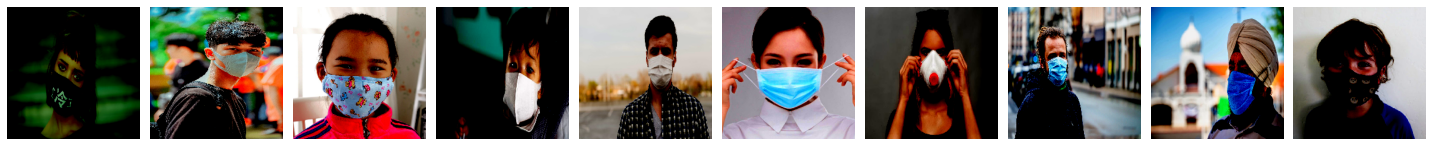

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [23]:
plotImages(imgs)
print(labels)

In [24]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
test_batches.class_indices

{'Mask': 0, 'Non Mask': 1}

In [26]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  0]
 [ 0 50]]


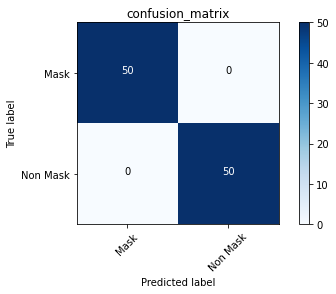

In [28]:
cm_plot_labels=['Mask', 'Non Mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#accuracy:(tp+tn)/(p+n)
accuracy=accuracy_score(test_batches.classes, np.argmax(predictions,axis=-1))
#precision:(tp)/(tp+fp)
precision=precision_score(test_batches.classes, np.argmax(predictions,axis=-1))
#recall:(tp)/(tp+fn)
recall=recall_score(test_batches.classes, np.argmax(predictions,axis=-1))
#f1_score:2*tp/(2*tp+fp+fn)
f1_score(test_batches.classes, np.argmax(predictions,axis=-1))

1.0

In [31]:
mobile_new.save('face-detector.h5')

In [2]:
from tensorflow.keras.models import load_model
new_model=load_model('face-detector.h5')

In [3]:
def imgpreprocessing(file):
    file_path='image/'
    img=image.load_img(file_path+file, target_size=(224,224))
    img_array=image.img_to_array(img)
    print(img_array)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    print('img')
    print(img_array_expanded_dims)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


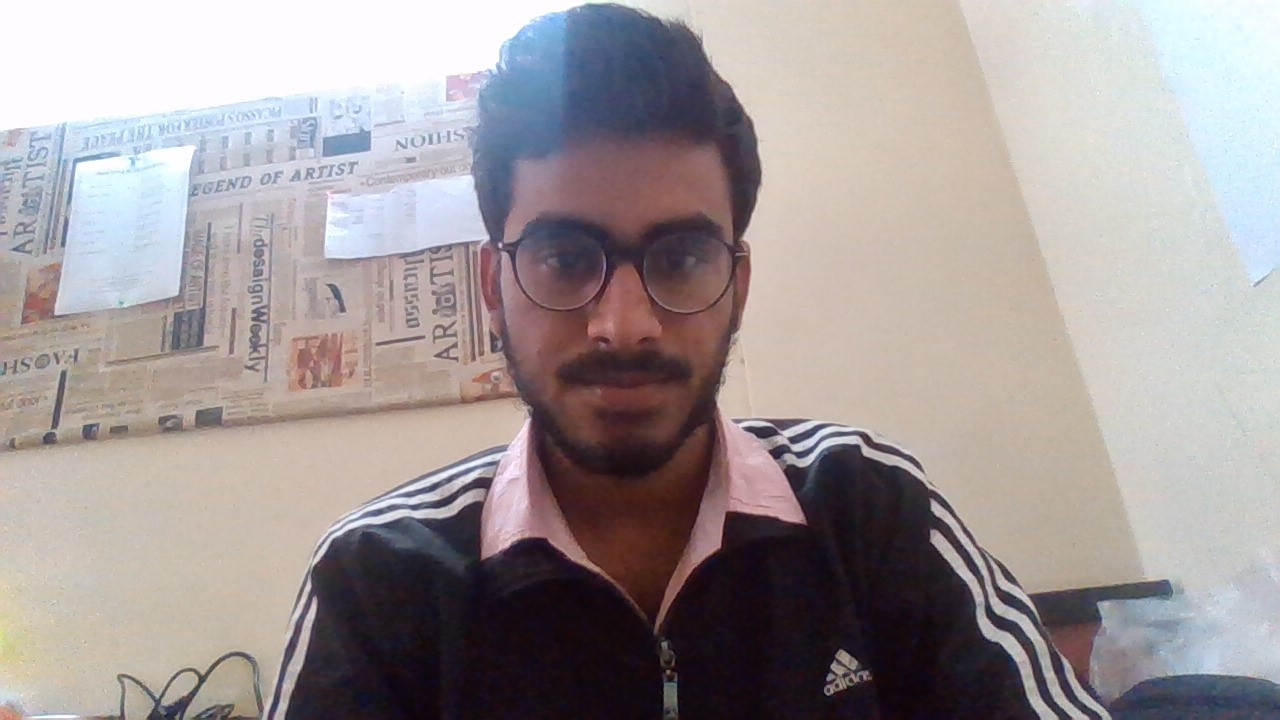

In [4]:
from IPython.display import Image
Image('image/k.jpg')

In [8]:
preprocessed_image=imgpreprocessing('k.jpg')

predictions=new_model.predict(preprocessed_image)
print(predictions[0][0])
np.argmax(predictions,axis=-1)==1


[[[255. 251. 255.]
  [255. 251. 255.]
  [255. 251. 255.]
  ...
  [248. 253. 255.]
  [246. 254. 255.]
  [246. 254. 255.]]

 [[255. 251. 255.]
  [255. 251. 255.]
  [255. 251. 255.]
  ...
  [242. 252. 254.]
  [244. 254. 255.]
  [245. 255. 255.]]

 [[255. 251. 255.]
  [255. 251. 255.]
  [255. 251. 255.]
  ...
  [243. 254. 255.]
  [242. 251. 255.]
  [244. 253. 255.]]

 ...

 [[213. 156. 137.]
  [189. 146. 130.]
  [170. 146. 136.]
  ...
  [ 62.  73.  93.]
  [ 62.  64.  85.]
  [ 69.  70.  90.]]

 [[199. 147. 136.]
  [211. 149. 134.]
  [193. 138. 118.]
  ...
  [ 67.  75.  98.]
  [ 76.  76. 100.]
  [ 73.  78. 100.]]

 [[207. 150. 133.]
  [208. 135. 118.]
  [204. 137. 118.]
  ...
  [ 71.  76.  98.]
  [ 78.  78. 104.]
  [ 64.  76. 102.]]]
img
[[[[255. 251. 255.]
   [255. 251. 255.]
   [255. 251. 255.]
   ...
   [248. 253. 255.]
   [246. 254. 255.]
   [246. 254. 255.]]

  [[255. 251. 255.]
   [255. 251. 255.]
   [255. 251. 255.]
   ...
   [242. 252. 254.]
   [244. 254. 255.]
   [245. 255. 255.]]



array([ True])

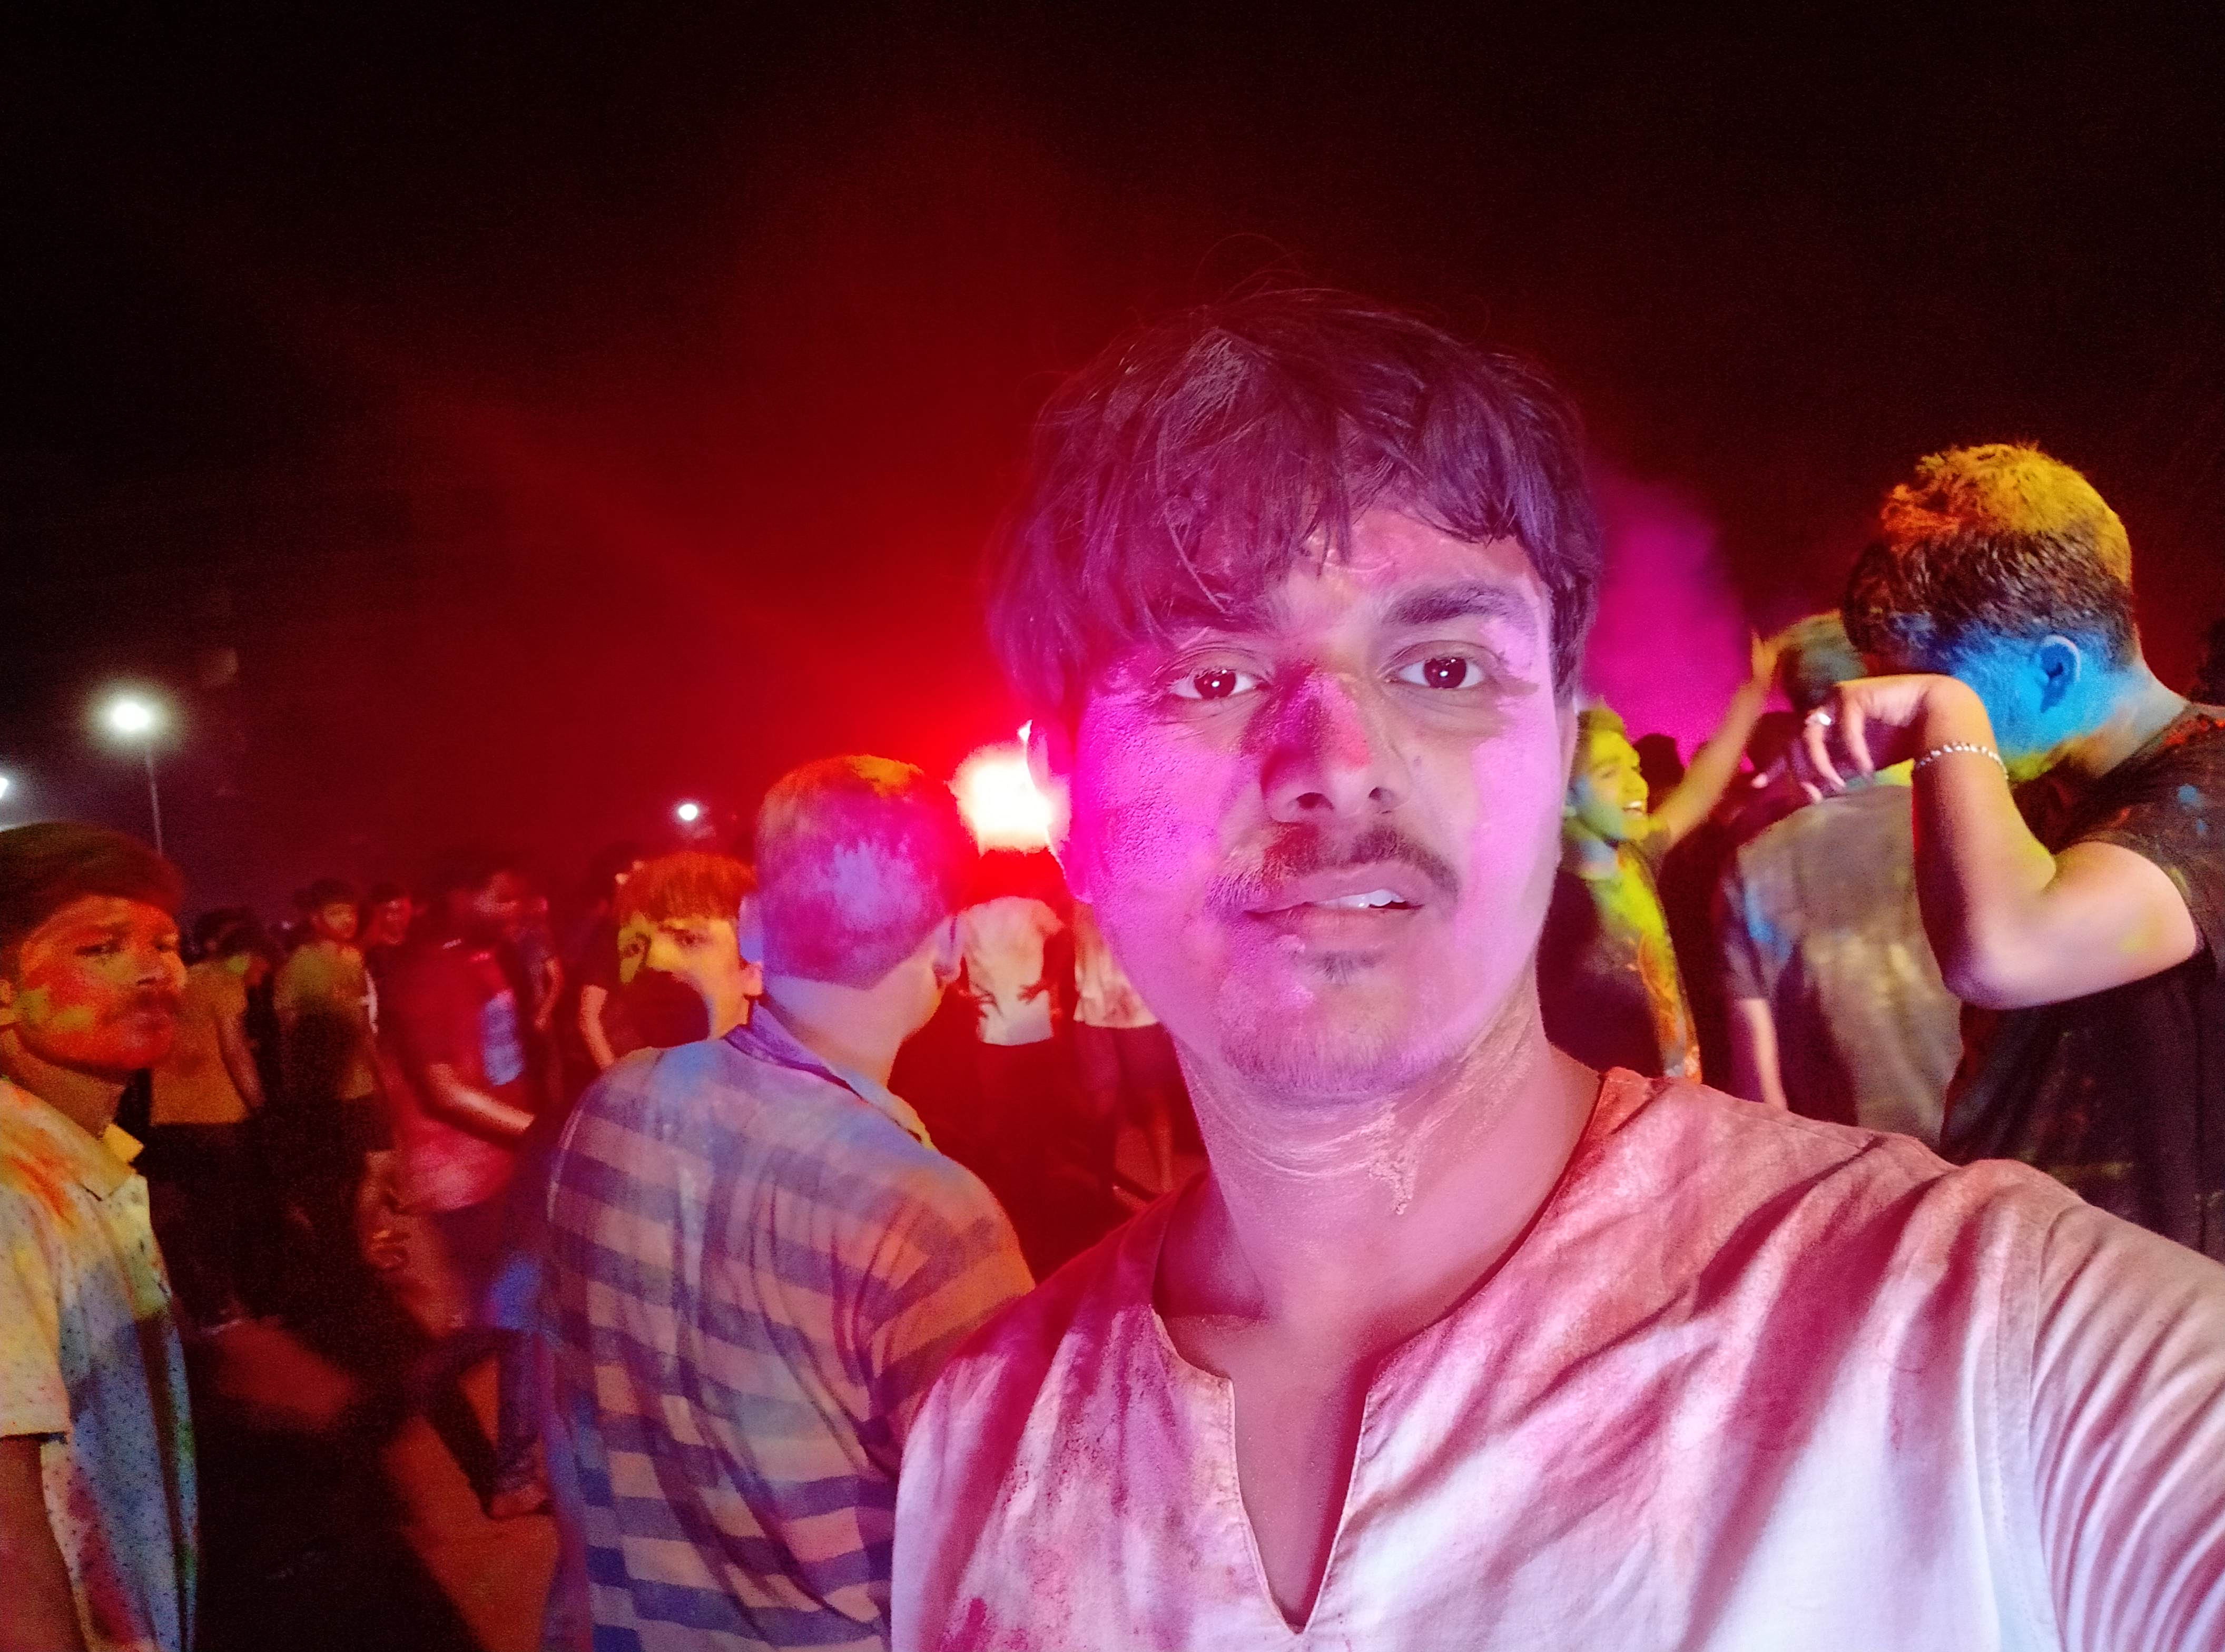

In [50]:
Image('image/a.jpg')

In [51]:
preprocessed_image=imgpreprocessing('a.jpg')
new_model.predict(preprocessed_image)

array([[3.6096768e-04, 9.9963903e-01]], dtype=float32)

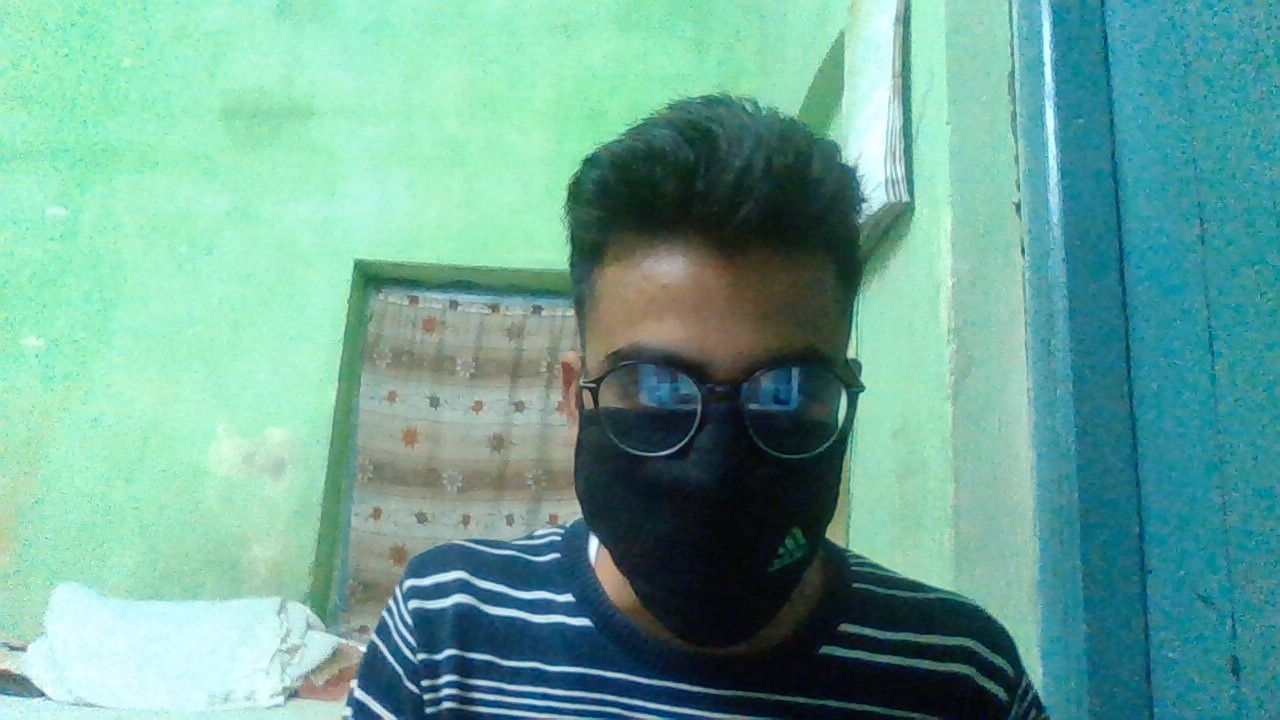

In [52]:
Image('image/m.jpg')

In [53]:
preprocessed_image=imgpreprocessing('m.jpg')
new_model.predict(preprocessed_image)

array([[1.000000e+00, 7.816701e-12]], dtype=float32)

In [9]:
import cv2
import numpy as np

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with
	# the detection
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# compute the (x, y)-coordinates of the bounding box for
		# the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# ensure the bounding boxes fall within the dimensions of
		# the frame
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

In [10]:
face_cascade=cv2.CascadeClassifier('opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
# face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
face_cascade

<CascadeClassifier 000001BA3E870B10>

In [ ]:
img=cv2.imread('Images/face_1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
cv2.imshow('detected_face',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
faces=face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
    img_d=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
cv2.imshow('detected_face',img_d)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
from tensorflow.keras.models import load_model
new_model=load_model('face-detector.h5')

In [11]:
def imgPreprocessing(img_array):
#     file_path='image/'
#     img=image.load_img(file_path+file, target_size=(224,224))
#     img_array=image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
#     print('img')
#     print(img_array_expanded_dims)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


In [90]:
cap= cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,640)

True

In [91]:
while True:
    success,img= cap.read()
    img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_rgb, (224,224))
    processed_img=imgPreprocessing(img_resize)
    prediction=new_model.predict(processed_img)
    rounded_prediction=np.round(prediction,4)
    confidence=str(rounded_prediction[0][0])
    print(rounded_prediction)
    print(np.argmax(prediction,axis=-1))
    cv2.putText(img, "prediction_of_mask_on:"+str(rounded_prediction[0][0]),(30,30),cv2.FONT_HERSHEY_COMPLEX,1.1,(0,255,0),1)
    faces= face_cascade.detectMultiScale(img_gray, 1.3, 7)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        if np.argmax(prediction,axis=-1)[0]==0:
#             confidence=str(round(predictions[0][0],2)
            cv2.putText(img,"Mask:"+str(rounded_prediction[0][0]), (x+10, y),cv2.FONT_HERSHEY_COMPLEX,1.2, (255,0,0),2)
        else :               
#             confidence=str(round(predictions[0][0],2)
            cv2.putText(img, "NO Mask:"+str(rounded_prediction[0][1]), (x+10, y),cv2.FONT_HERSHEY_COMPLEX,1.2, (255,0,0),2)
    if len(faces)==0:
        cv2.putText(img, "face_not_detected", (40,40),cv2.FONT_HERSHEY_COMPLEX,1.2, (255,0,0),2)
                
    cv2.imshow('predicted',img)
    
    if cv2.waitKey(1)&0xFF==ord('p'):
        break
    
    
cv2.destroyAllWindows()
cap.release()

[[0.756 0.244]]
[0]
[[0.496 0.504]]
[1]
[[0.5327 0.4673]]
[0]
[[0.6039 0.3961]]
[0]
[[0.7623 0.2377]]
[0]
[[0.6641 0.3359]]
[0]
[[0.5279 0.4721]]
[0]
[[0.3961 0.6039]]
[1]
[[0.9276 0.0724]]
[0]
[[0.2879 0.7121]]
[1]
[[0.7051 0.2949]]
[0]
[[0.9246 0.0754]]
[0]
[[0.42 0.58]]
[1]
[[0.6035 0.3965]]
[0]
[[0.9442 0.0558]]
[0]
[[0.9695 0.0305]]
[0]
[[0.6462 0.3538]]
[0]
[[0.2059 0.7941]]
[1]
[[0.2777 0.7223]]
[1]


In [12]:
img=cv2.imread('images/face_1.jpg')

cv2.imshow('predicted',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_resize=cv2.resize(img_rgb, (224,224))
processed_img=imgPreprocessing(img_resize)
prediction=new_model.predict(processed_img)
print(prediction)
faces= face_cascade.detectMultiScale(img_gray, 1.1, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    if np.argmax(prediction,axis=-1)==0:
        cv2.putText(img,"Mask", (x+10, y),cv2.FONT_HERSHEY_COMPLEX,2, (255,0,0),2)
    else:
        cv2.putText(img, "NoMask", (x+10, y),cv2.FONT_HERSHEY_COMPLEX,0.5, (255,0,0),2)
                
cv2.imshow('predicted',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[7.6803776e-13 1.0000000e+00]]
